<a href="https://colab.research.google.com/github/DaisyIpatzi/daisyipatzi.github.io/blob/main/assets/ML_Artifacts/Correlation_And_Regression/Correlation_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

Objective: Demonstrate various statistical and machine learning techniques in Python using libraries such as NumPy, SciPy, Matplotlib, Seaborn, and Scikit-learn. The examples cover concepts including covariance, Pearson correlation, linear regression, multiple linear regression, and polynomial regression. These examples aim to enhance understanding and proficiency in statistical analysis and machine learning techniques for predictive modeling.

In [ ]:
#Installs
!pip install scipy


# Ex1. Covariance and Pearson Correlation

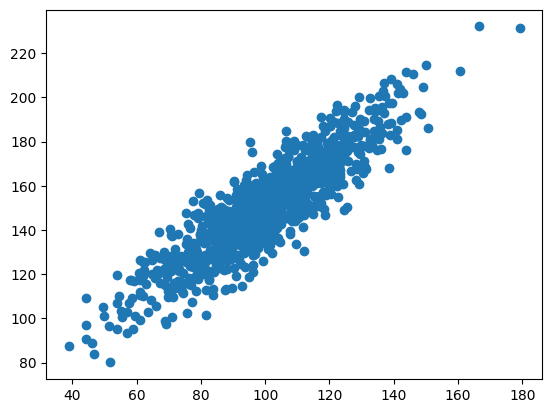

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358
Covariance: 389.755
Pearsons correlation: 0.888


In [ ]:
# calculate the Pearson's correlation between two variables
from numpy import mean
from numpy import std
from numpy import cov
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# calculate covariance matrix
covariance = cov(data1, data2)

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)

# plot
plt.scatter(data1, data2)
plt.show()

# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
print('Covariance: %.3f' % covariance[0][1])
print('Pearsons correlation: %.3f' % corr)

#data1: mean=100.776 stdv=19.620
#data2: mean=151.050 stdv=22.358
#Covariance: 389.755

### Interpretation


**Average:**

Data1 has a mean (average) value of 100.776. This suggests that the average value of the observations in data1 is around 100.776. Data2 has a mean value of 151.050, indicating its average value is higher than that of data1.

**Standard Deviation of Data1 and Data2:**

The standard deviation of data1 is 19.620, which suggests that the data points in data1 tend to be within approximately 19.620 units of the mean. The standard deviation of data2 is 22.358, implying a slightly greater spread of data points around the mean compared to data1.

**Covariance:**
The covariance between data1 and data2 is 389.755. Covariance indicates the direction of the linear relationship between two variables. A positive covariance (as in this case) suggests that data1 and data2 tend to increase together. However, covariance does not provide information about the strength of the relationship.

**Pearson's Correlation Coefficient:**
The Pearson's correlation coefficient is 0.888, which is close to 1. This indicates a strong positive linear relationship between data1 and data2. The closer the coefficient is to 1 or -1, the stronger the correlation; a coefficient close to 0 indicates little to no linear correlation. In summary, data1 and data2 have a strong positive linear relationship, with data2 generally having higher values than data1. The data in both sets are somewhat spread out, as indicated by their standard deviations.

# Ex2. Linear Regression

Pearsons correlation: -0.759


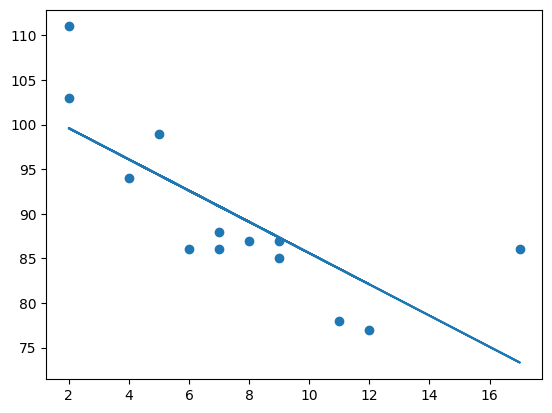

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

#Create the arrays that represent the values of the x and y axis
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

#Execute a method that returns some important key values of Linear Regression
slope, intercept, r, p, std_err = stats.linregress(x, y)

# measure the correlation
corr, _ = stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

#Create a function that uses the slope and intercept values to return a new value.
#This new value represents where on the y-axis the corresponding x value will be placed
def myfunc(x):
  return slope * x + intercept

#Run each value of the x array through the function. This will result in a new array with new values for the y-axis
mymodel = list(map(myfunc, x))

#Draw the original scatter plot & the line of linear regression
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()


### Predict Future Values

In [ ]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return intercept + slope * x

speed = myfunc(10)

print(speed)

#If x=10 then predicted y is 85.59

85.59308314937454


### Interpretation

A Pearson's correlation coefficient of -0.759 indicates a strong negative linear relationship between two variables.

Magnitude of the Correlation (0.759): The value 0.759 (ignoring the sign for now) is relatively close to 1, which suggests a strong correlation. Pearson's correlation coefficient ranges from -1 to 1, where values close to 1 or -1 indicate a strong correlation, and values near 0 indicate a weak correlation.

Direction of the Correlation (- Sign): The negative sign indicates a negative or inverse relationship. This means that as one variable increases, the other variable tends to decrease, and vice versa.

In practical terms, a Pearson's correlation of -0.759 would suggest that as one of these variables increases, the other tends to decrease significantly. However, it's important to remember that correlation does not imply causation; this statistic merely indicates a tendency for the variables to move in opposite directions, not that one variable causes the change in the other.

# Ex3. Multiple Linear Regression

In [ ]:
import pandas
from sklearn import linear_model

#Data: https://github.com/DaisyIpatzi/daisyipatzi.github.io/blob/main/assets/ML_Artifacts/Correlation_And_Regression/cars.csv
df = pandas.read_csv("/content/data/cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Coeficient

The coefficient is a factor that describes the relationship with an unknown variable.
In this case, we can ask for the coefficient value of weight against CO2, and for volume against CO2. The answer(s) we get tells us what would happen if we increase, or decrease, one of the independent values.

In [ ]:
print(regr.coef_)

[0.00755095 0.00780526]


The result array represents the coefficient values of weight and volume.

Weight: 0.00755095
Volume: 0.00780526

These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.

And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g.

I think that is a fair guess, but let test it!

We have already predicted that if a car with a 1300cm3 engine weighs 2300kg, the CO2 emission will be approximately 107g.

What if we increase the weight with 1000kg (from 2300 to 3300) what will be the CO2 emission?

Ans: 107.2087328 + (1000 * 0.00755095) = 114.75968

In [ ]:
predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

[114.75968007]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Ex4. Polynomial Regression

18 cars passing a certain tollboth at different time of the day (x) with different speed (y)

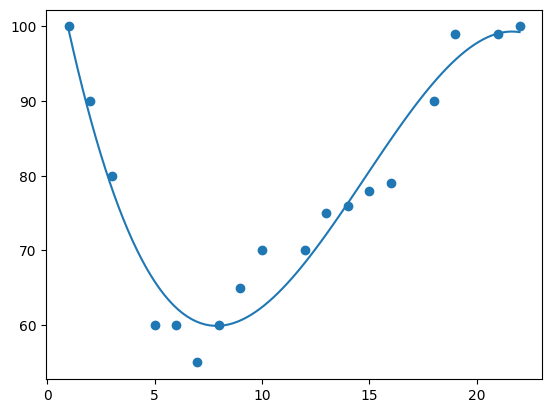

In [ ]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

#NumPy has a method that lets us make a polynomial model
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

#specify how the line will display, we start at position 1, and end at position 22
myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related

In [ ]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


### Predict Future Values

Let us try to predict the speed of a car that passes the tollbooth at around 17 P.M

In [ ]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

speed = mymodel(17)
print(speed)

88.87331269698001
